In [1]:
# ==============================================================
#  TRACE FINDER - MODEL TRAINING NOTEBOOK
#  Purpose: Train ML models to identify scanner source
#  Author: Karam Madhavan
# ==============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load dataset
csv_path = r"D:\Infosys_AI-Tracefinder\Output\Output_for_Allfiles.csv"
df = pd.read_csv(csv_path)

# Display dataset information
print("✅ Dataset loaded successfully!")
print("Total Samples:", len(df))
df.info()

from IPython.display import display, HTML
display(HTML(df.to_html()))


✅ Dataset loaded successfully!
Total Samples: 510
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   file_name         510 non-null    object 
 1   class_label       510 non-null    object 
 2   resolution_level  510 non-null    int64  
 3   width             510 non-null    int64  
 4   height            510 non-null    int64  
 5   aspect_ratio      510 non-null    float64
 6   file_size_kb      510 non-null    float64
 7   mean_intensity    510 non-null    float64
 8   std_intensity     510 non-null    float64
 9   skewness          510 non-null    float64
 10  kurtosis          510 non-null    float64
 11  entropy           510 non-null    float64
 12  edge_density      510 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 51.9+ KB


,file_name,class_label,resolution_level,width,height,aspect_ratio,file_size_kb,mean_intensity,std_intensity,skewness,kurtosis,entropy,edge_density
0,s1_1.tif,Canon120-1,150,1240,1752,0.707763,6366.801758,0.972384,0.125708,-4.814408,22.196394,0.754398,0.073345
1,s1_100.tif,Canon120-1,150,1240,1752,0.707763,6366.801758,0.985248,0.092142,-6.863455,48.042527,0.414492,0.043726
2,s1_11.tif,Canon120-1,150,1240,1752,0.707763,6366.801758,0.973885,0.117238,-4.927449,24.068126,0.690913,0.094469
3,s1_16.tif,Canon120-1,150,1240,1752,0.707763,6366.801758,0.982558,0.091892,-5.943695,36.294029,0.615352,0.069813
4,s1_17.tif,Canon120-1,150,1240,1752,0.707763,6366.801758,0.993028,0.062540,-10.006754,103.402678,0.263591,0.024140
5,s1_2.tif,Canon120-1,150,1240,1752,0.707763,6366.801758,0.958983,0.136654,-3.713142,13.230966,1.259174,0.163182
6,s1_20.tif,Canon120-1,150,1240,1752,0.707763,6366.801758,0.971349,0.120921,-4.693278,21.691931,0.990210,0.096566
7,s1_25.tif,Canon120-1,150,1240,1752,0.707763,6366.801758,0.977159,0.117425,-5.442469,28.932585,0.543884,0.058489
8,s1_3.tif,Canon120-1,150,1240,1752,0.707763,6366.801758,0.978708,0.107627,-5.525335,30.516123,0.601358,0.069759
9,s1_34.tif,Canon120-1,150,1240,1752,0.707763,6366.801758,0.986984,0.080263,-6.997593,50.785595,0.470801,0.048852


In [3]:
# Check for missing values
print("\n🔍 Checking for missing values:")
print(df.isnull().sum())

# Data types summary
print("\n📊 Dataset Info:")
df.info()



🔍 Checking for missing values:
file_name           0
class_label         0
resolution_level    0
width               0
height              0
aspect_ratio        0
file_size_kb        0
mean_intensity      0
std_intensity       0
skewness            0
kurtosis            0
entropy             0
edge_density        0
dtype: int64

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   file_name         510 non-null    object 
 1   class_label       510 non-null    object 
 2   resolution_level  510 non-null    int64  
 3   width             510 non-null    int64  
 4   height            510 non-null    int64  
 5   aspect_ratio      510 non-null    float64
 6   file_size_kb      510 non-null    float64
 7   mean_intensity    510 non-null    float64
 8   std_intensity     510 non-null    float64
 9   skewness          510 non

In [4]:
# Encode class labels (scanner models)
le = LabelEncoder()
df['class_label_encoded'] = le.fit_transform(df['class_label'])

# Separate features and target
X = df.drop(columns=['file_name', 'class_label', 'class_label_encoded'])
y = df['class_label_encoded']

# Feature scaling (important for SVM/Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Features and labels prepared successfully!")
print("Feature shape:", X_scaled.shape)
print("Unique classes:", le.classes_)


✅ Features and labels prepared successfully!
Feature shape: (510, 11)
Unique classes: ['Canon120-1' 'Canon120-2' 'Canon220' 'Canon9000-1' 'Canon9000-2'
 'EpsonV370-1' 'EpsonV370-2' 'EpsonV39-1' 'EpsonV39-2' 'EpsonV550' 'HP']


In [5]:
# Split dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Train/Test Split Complete")
print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])


✅ Train/Test Split Complete
Training Samples: 408
Testing Samples: 102


In [6]:
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n🔹 {name} Accuracy: {acc*100:.2f}%")
    print(classification_report(y_test, y_pred, target_names=le.classes_))



🔹 Random Forest Accuracy: 66.67%
              precision    recall  f1-score   support

  Canon120-1       0.36      0.33      0.35        12
  Canon120-2       0.40      0.50      0.44        12
    Canon220       0.80      0.57      0.67         7
 Canon9000-1       0.71      0.91      0.80        11
 Canon9000-2       0.89      0.73      0.80        11
 EpsonV370-1       0.64      0.75      0.69        12
 EpsonV370-2       0.00      0.00      0.00         5
  EpsonV39-1       0.73      0.80      0.76        10
  EpsonV39-2       0.00      0.00      0.00         3
   EpsonV550       1.00      1.00      1.00         2
          HP       1.00      1.00      1.00        17

    accuracy                           0.67       102
   macro avg       0.59      0.60      0.59       102
weighted avg       0.65      0.67      0.65       102


🔹 SVM Accuracy: 57.84%
              precision    recall  f1-score   support

  Canon120-1       0.42      0.67      0.52        12
  Canon120-2       0

c:\Users\madha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\madha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\madha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

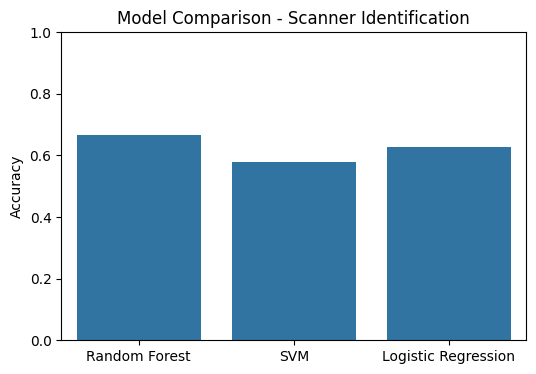

In [7]:
# Compare model performance
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Comparison - Scanner Identification")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()



🏆 Best Model: Random Forest


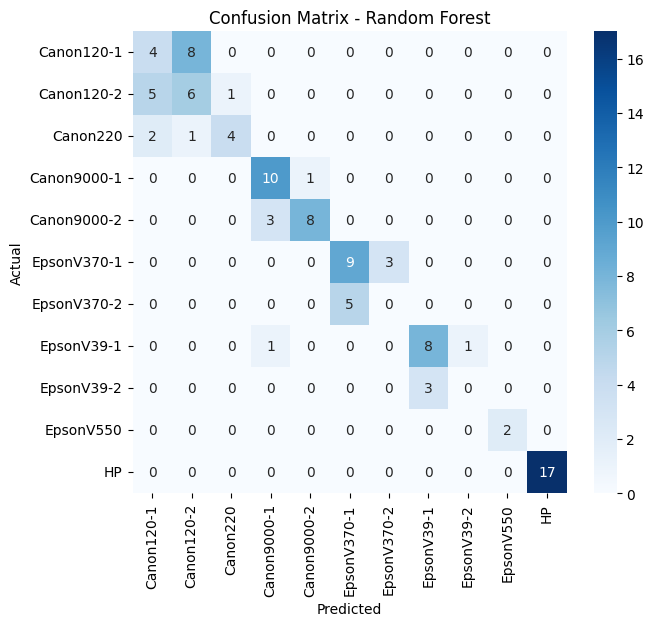

In [8]:
# Choose best model (highest accuracy)
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\n🏆 Best Model: {best_model_name}")

# Confusion matrix
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


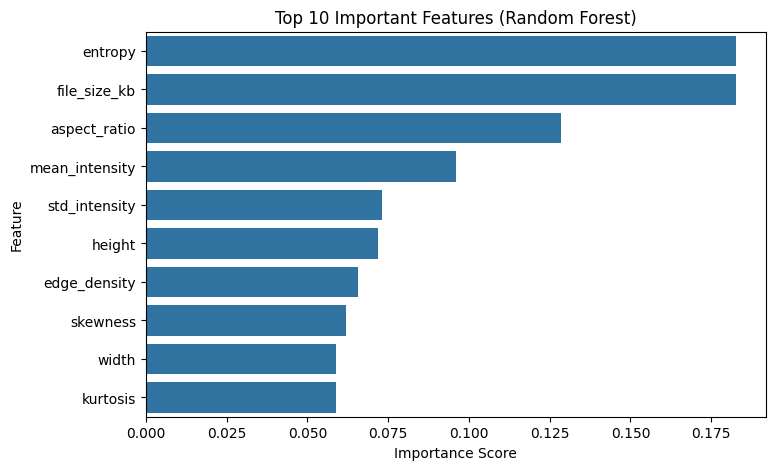

In [15]:
if best_model_name == "Random Forest":
    importances = best_model.feature_importances_
    feature_names = X.columns

    feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

    plt.figure(figsize=(8,5))
    sns.barplot(x=feat_imp.values[:10], y=feat_imp.index[:10])
    plt.title("Top 10 Important Features (Random Forest)")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()


In [17]:
import joblib

model_path = r"D:\Infosys_AI-Tracefinder\Output\best_model.pkl"
scaler_path = r"D:\Infosys_AI-Tracefinder\Output\scaler.pkl"
encoder_path = r"D:\Infosys_AI-Tracefinder\Output\label_encoder.pkl"

joblib.dump(best_model, model_path)
joblib.dump(scaler, scaler_path)
joblib.dump(le, encoder_path)

print("✅ Model, Scaler, and Encoder saved successfully!")


✅ Model, Scaler, and Encoder saved successfully!
